In [3]:
import pandas as pd
import numpy as np
import requests
import json
import pickle
from dateutil import rrule
import datetime as dt
from datetime import datetime, timedelta
import matplotlib
import geojson
%matplotlib inline


In [67]:
url = 'http://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2016-01-01&endtime=2016-01-31'
data = '{"query":{"bool":{"must":[{"text":{"record.document":"SOME_JOURNAL"}},{"text":{"record.articleTitle":"farmers"}}],"must_not":[],"should":[]}},"from":0,"size":50,"sort":[],"facets":{}}'
response = requests.get(url, data=None)
data = geojson.loads(response.text)

In [10]:
data = json.loads(response.text)

In [13]:
data = response.json()

Point
[-122.7747, 38.8377, 2.8]


In [32]:
data = geojson.loads(response.text)

In [22]:
for feature in data['features']:
    print(feature['geometry']['type'])
    print(feature['geometry']['coordinates'])
    break

Point
[-122.7747, 38.8377, 2.8]


In [27]:
type(data)

geojson.feature.FeatureCollection

In [28]:
for indx, feature in enumerate(data):
    print(feature)
    break

type


In [66]:
len(data.features)

AttributeError: 'str' object has no attribute 'features'

In [39]:
# https://wiki.python.org/moin/UsingPickle
pickle.dump(data, open("earthquake_Jan2016.p", "wb" ))
# favorite_color = pickle.load( open( "save.p", "rb" ) )

In [40]:
url = 'http://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2016-01-01&endtime=2016-12-31'
data = '{"query":{"bool":{"must":[{"text":{"record.document":"SOME_JOURNAL"}},{"text":{"record.articleTitle":"farmers"}}],"must_not":[],"should":[]}},"from":0,"size":50,"sort":[],"facets":{}}'
response = requests.get(url, data=None)
data = geojson.loads(response.text)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [13]:
start = datetime(2016, 1, 1, 0, 0)
months = list(rrule.rrule(rrule.MONTHLY, count=4, dtstart=start))    

annual_earthquakes = list()

for i in range(len(months)-1):
    date = months[i]
    print(str(date.date()), str((months[i+1] - timedelta(days=1)).date()))
    url = 'http://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime='+str(date.date())+'&endtime=' + str((months[i+1]-timedelta(days=1)).date())
#     http://stackoverflow.com/questions/17301938/making-a-request-to-a-restful-api-using-python
    response = requests.get(url, data=None)
    data = geojson.loads(response.text)
    annual_earthquakes.extend(data.features)

2016-01-01 2016-01-31


In [14]:
len(annual_earthquakes)

9615

In [15]:
pickle.dump(annual_earthquakes, open("earthquake_Jan2016.p", "wb" ))

In [3]:
# pickle.dump(data, open("earthquake_Jan2016.p", "wb" ))
data = pickle.load( open( "earthquake_Jan2016.p", "rb" ) )

In [83]:
len(data.features)

9615

In [109]:
list(data.features[0].properties.values())

[1454201165963,
 'nc',
 0,
 None,
 'http://earthquake.usgs.gov/earthquakes/eventpage/nc72586646',
 '72586646',
 143,
 None,
 'M 0.4 - 10km W of Cobb, California',
 7,
 'http://earthquake.usgs.gov/fdsnws/event/1/query?eventid=nc72586646&format=geojson',
 ',general-link,geoserve,nearby-cities,origin,phase-data,scitech-link,',
 '10km W of Cobb, California',
 1454198395340,
 -480,
 0.009799,
 0.43,
 'earthquake',
 None,
 ',nc72586646,',
 0.03,
 'md',
 None,
 'automatic',
 3,
 ',nc,']

In [152]:
proplist = list()
proplist.append(list(annual_earthquakes[0].properties.keys()))
for indx, quake in enumerate(annual_earthquakes):
    proplist.append(list(quake.properties.values()))
np_proplist = np.array(proplist).astype(np.str)
np.savetxt('earthquake.tsv', np_proplist, delimiter="\t", fmt='%s')

In [154]:
cnt = 0
proplist = list()
proplist.append(list(annual_earthquakes[0].properties.keys()))
for indx, quake in enumerate(annual_earthquakes):
    if(cnt==1000):
        break
    else:
        proplist.append(list(quake.properties.values()))
        cnt += 1
np_proplist = np.array(proplist).astype(np.str)
np.savetxt('earthquake_Jan2016_smaller.tsv', np_proplist, delimiter="\t", fmt='%s')

In [118]:
proplist.append(list(data.features[0].properties.keys()))
proplist.append(list(data.features[0].properties.values()))
proplist.append(list(data.features[1].properties.values()))

In [216]:
np_proplist = np.array(proplist).astype(np.str)

In [148]:
# with open('earthquake.csv','wb') as f:
# #     np.savetxt(f,x,fmt='%.5f')
np.savetxt('earthquake.tsv', np_proplist, delimiter="\t", fmt='%s')

In [4]:
annual_earthquakes = pickle.load( open( "earthquake_Jan2016.p", "rb" ) )

In [5]:
annual_earthquakes[0]

{"geometry": {"coordinates": [-122.8478317, 38.836834, 2.65], "type": "Point"}, "id": "nc72586646", "properties": {"alert": null, "cdi": null, "code": "72586646", "detail": "http://earthquake.usgs.gov/fdsnws/event/1/query?eventid=nc72586646&format=geojson", "dmin": 0.009799, "felt": null, "gap": 143, "ids": ",nc72586646,", "mag": 0.43, "magType": "md", "mmi": null, "net": "nc", "nst": 7, "place": "10km W of Cobb, California", "rms": 0.03, "sig": 3, "sources": ",nc,", "status": "automatic", "time": 1454198395340, "title": "M 0.4 - 10km W of Cobb, California", "tsunami": 0, "type": "earthquake", "types": ",general-link,geoserve,nearby-cities,origin,phase-data,scitech-link,", "tz": -480, "updated": 1454201165963, "url": "http://earthquake.usgs.gov/earthquakes/eventpage/nc72586646"}, "type": "Feature"}

In [6]:
cnt = 0
proplist = list()
keys = list(annual_earthquakes[0].properties.keys())
keys.append('long')
keys.append('lat')
proplist.append(keys)
for indx, quake in enumerate(annual_earthquakes):
    values = list(quake.properties.values())
    values.append(quake.geometry.coordinates[0])
    values.append(quake.geometry.coordinates[1])
    proplist.append(values)
np_proplist = np.array(proplist).astype(np.str)

In [7]:
df = pd.DataFrame(np_proplist[1:],columns=list(np_proplist[0]))
df = df.set_index('time')
# df.index = (df.index/1000).astype(np.int64)
df.index = pd.to_datetime(df.index ,unit='ms')
df = df.convert_objects(convert_numeric=True)
df = df.fillna(0)
df = df.sort_index()

C:\Python35\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [16]:
# Sonic Boom
df[df.index == '2016-01-28 18:23:45.000' ][['title']]

# df[df.index == '2016-01-17 10:21:00.190' ][['title']]


,title
time,
2016-01-28 18:23:45,"M 0.0 Sonic Boom - 12km SE of Atlantic City, N..."


In [12]:
df[['dmin']].max()

dmin    49.235
dtype: float64

In [ ]:
dmin: 0.06729,
rms: 0.09,
gap: 51,

In [17]:

# https://mpld3.github.io/examples/scatter_tooltip.html
mpld3.enable_notebook()
fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))

# s=1000 * np.random.random(size=N),
                     
mag_np = df[['mag']].ix[0:,0].as_matrix()
sig_np = df[['sig']].ix[0:,0].as_matrix()
time_np = np.array(df.index.astype(np.str))
# df[['time']].ix[0:,0].as_matrix()
N = len(sig_np)


scatter = ax.scatter(mag_np,
                     sig_np,
                     c=np.random.random(size=N),
                     alpha=0.3,
                     cmap=plt.cm.jet)
ax.grid(color='white', linestyle='solid')
ax.set_autoscale_on(False)

ax.set_title("Scatter Plot (with tooltips!)", size=20)

labels = [str(time_np[i]) for i in range(N)]
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)

mpld3.display()

In [8]:
# Sonic Boom Outlier - M 0.0 Sonic Boom - 12km SE of Atlantic City, N
# http://foxtrotalpha.jalopnik.com/mystery-sonic-boom-did-not-come-from-atlantic-city-base-1755786208
# http://www.disaster-report.com/2016/01/sonic-boom-new-jersey-earthquake.html

In [1]:
import mpld3

'0.3git'

matplotlib.axes._subplots.AxesSubplot

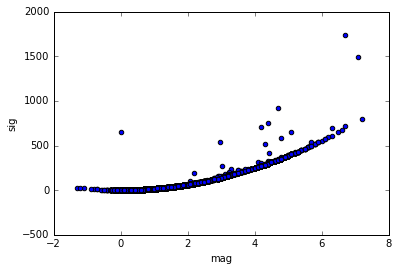

In [13]:
scatter = df.plot(kind='scatter', x='mag', y='sig')
type(scatter)

In [338]:
# eq_sorted[['net','tsunami','felt','code','magType','nst','dmin','mag','type','rms','ids','gap','alert','status','sig','title','cdi']]

In [24]:
# df = df.convert_objects(convert_numeric=True)
# http://stackoverflow.com/questions/24082784/pandas-dataframe-groupby-datetime-month
pdg = pd.groupby(df,by=[df.index.week,df.index.year])

In [26]:
pdg.sig.mean()

1   2016    80.970755
2   2016    73.619366
3   2016    73.759982
4   2016    73.950000
53  2016    69.715116
Name: sig, dtype: float64

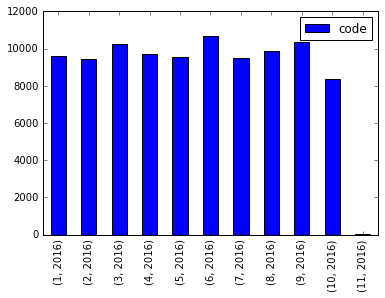

In [51]:
pdg.count()[['code']].plot(kind='bar')

In [37]:
pd_mag = pd.groupby(df,by=[df.magType])

In [44]:
pd_mag.count()[['code']]

C:\Python35\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


,code
magType,
Mb,6
Md,3089
Ml,25
Mw,1
None,186
Unknown,1
mb,10630
mb_lg,310
md,20725


In [8]:
type(df[['mag']].ix[0,0])

numpy.float64

In [373]:
df[['mag']].mean()

mag    1.66139
dtype: float64

In [182]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [183]:

df.index.name = 'time'
df[0:3]

,A,B,C,D
time,,,,
2013-01-01,-1.132757,-0.407525,0.835768,-2.194102
2013-01-02,0.721517,1.968180,-1.765901,0.722515
2013-01-03,0.520640,0.221484,0.307001,-0.019705


In [208]:
df.ix[-1]

updated                                        1460156778040
net                                                       us
tsunami                                                    0
felt                                                    None
url        http://earthquake.usgs.gov/earthquakes/eventpa...
code                                                20004v82
mmi                                                     None
magType                                                   mb
nst                                                     None
detail     http://earthquake.usgs.gov/fdsnws/event/1/quer...
types      ,geoserve,nearby-cities,origin,phase-data,tect...
dmin                                                   1.383
tz                                                       600
place                  138km SSW of Kokopo, Papua New Guinea
mag                                                      4.4
type                                              earthquake
rms                     

In [268]:
df = result

In [275]:
len(df[df.felt != 'None'])

14627

In [280]:
df[df.felt != 'None'][['felt']]

,felt
time,
2016-01-01 00:30:04.900,0
2016-01-01 00:37:53.000,1
2016-01-01 00:37:58.700,0
2016-01-01 02:00:39.950,0
2016-01-01 02:06:45.820,3
2016-01-01 02:36:58.930,0
2016-01-01 03:13:20.800,1
2016-01-01 03:26:08.910,0
2016-01-01 03:29:31.800,5


In [60]:
len(df[df.tsunami!=0])

282

In [285]:
n1 = 'nilav'
n2 = 'ria'

"hi there %s whose name is %s" % (n1,n2)

'hi there nilav whose name is ria'

In [8]:
from IPython.display import HTML
import folium
from folium.plugins import MarkerCluster
from folium import plugins
# def display(m, height=300):
#     """Takes a folium instance and embed HTML."""
#     m._build_map()
#     srcdoc = m.HTML.replace('"', '&quot;')
#     embed = HTML('<iframe srcdoc="{0}" '
#                  'style="width: 100%; height: {1}px; '
#                  'border: none"></iframe>'.format(srcdoc, height))
#     return embed

In [381]:

map_osm = folium.Map(location=[45.5236, -122.6750])
map_osm.save('osm.html')

map_1 = folium.Map(location=[45.372, -121.6972], zoom_start=12)
folium.Marker([45.3288, -121.6625], popup='Mt. Hood Meadows').add_to(map_1)
folium.Marker([45.3311, -121.7113], popup='Timberline Lodge').add_to(map_1)
map_1.save('mthood.html')

In [386]:
len(annual_earthquakes)

97356

In [29]:
annual_earthquakes[0].properties['nst']

7

In [36]:
# Using USGS style tile
url_base = 'http://server.arcgisonline.com/ArcGIS/rest/services/'
service = 'NatGeo_World_Map/MapServer/tile/{z}/{y}/{x}'
tileset = url_base + service

map_1 = folium.Map(location=[45.372, -121.6972], zoom_start=12)

map_1 = folium.Map(location=[37.8716, -122.2727], zoom_start=2,\
                control_scale = True, tiles=tileset, attr='USGS style')


# folium.Marker([45.3288, -121.6625], popup='Mt. Hood Meadows').add_to(map_1) 
# folium.Marker([45.3311, -121.7113], popup='Timberline Lodge').add_to(map_1) 
lons = list()
lats = list()
mags = list()
for indx,quake in  df[0:50000].iterrows():
    Y = quake['long']
    X = quake['lat']
    mag = quake['rms']
    lons.append(Y)
    lats.append(X)
    mags.append(mag)


# I am using the magnitude as the weight for the heatmap
map_1.add_children(plugins.HeatMap(zip(lats, lons, mags), radius = 10))
    
# locations = list(zip(lons, lats))
# # cluster = MarkerCluster(np.random.uniform(0, 90, (10, 2))).add_to(map_1)
# MarkerCluster(locations).add_to(map_1)
map_1.save('rms_heatmap.html')

In [ ]:
# Pandas with geojson
# http://lenguyenthedat.com/drawing-maps-python/